# Probability essentials

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [5]:
def plot_density_family(distribution, μ, σ, *, linewidths=None):
    """
    Plot a m x n grid of probability densities for the given distribution family.
    
    Parameters
    ----------
    distribution : a scipy.stats distribution class (e.g. scipy.stats.norm)
    
    μ : array
        Vector of means (in case of Gaussian)
        
    σ : array
        Vector of standard deviations (in case of Gaussian)
        
    linewidths: None or array
        Optional: an 2d array of line widths for each of the μ, σ combinations.
        
    Pass a scipy.stats distribution object like scipy.stats.norm
    and vectors of its parameters (e.g. mu_params, sd_params, ...)
    to plot over.
    """
    xmin = np.min(μ) - 4 * np.max(σ)
    xmax = np.max(μ) + 4 * np.max(σ)
    x = np.linspace(xmin, xmax, 100)
    m, n = len(σ), len(μ)
    f, ax = plt.subplots(m, n, sharex=True, sharey=True, figsize=(12, 12))
    if linewidths is None:
        linewidths = np.ones((n, m), dtype=int)
    for i, σ_i in enumerate(σ[::-1]):
        for j, μ_j in enumerate(μ):
            y = stats.norm(μ_j, σ_i).pdf(x)
            ax[i, j].plot(x, y, linewidth=linewidths.T[i, j])
            label = "$\\mu$ = {:3.2f}\n$\\sigma$ = {:3.2f}".format(μ_j, σ_i)
            ax[i, j].plot(0, 0, label=label, alpha=0)
            ax[i, j].legend(fontsize=12)
    ax[m-1, len(μ)//2].set_xlabel('$x$', fontsize=16)
    ax[len(σ)//2, 0].set_ylabel('$p(x)$', fontsize=16)
    plt.tight_layout()

In [6]:
isinstance(stats.norm, stats.distributions.rv_continuous)

True

In [7]:
μ = [-2, -1, 0, 1, 2, 3, 4]
σ = [0.25, 0.5, 0.75, 1, 1.25]

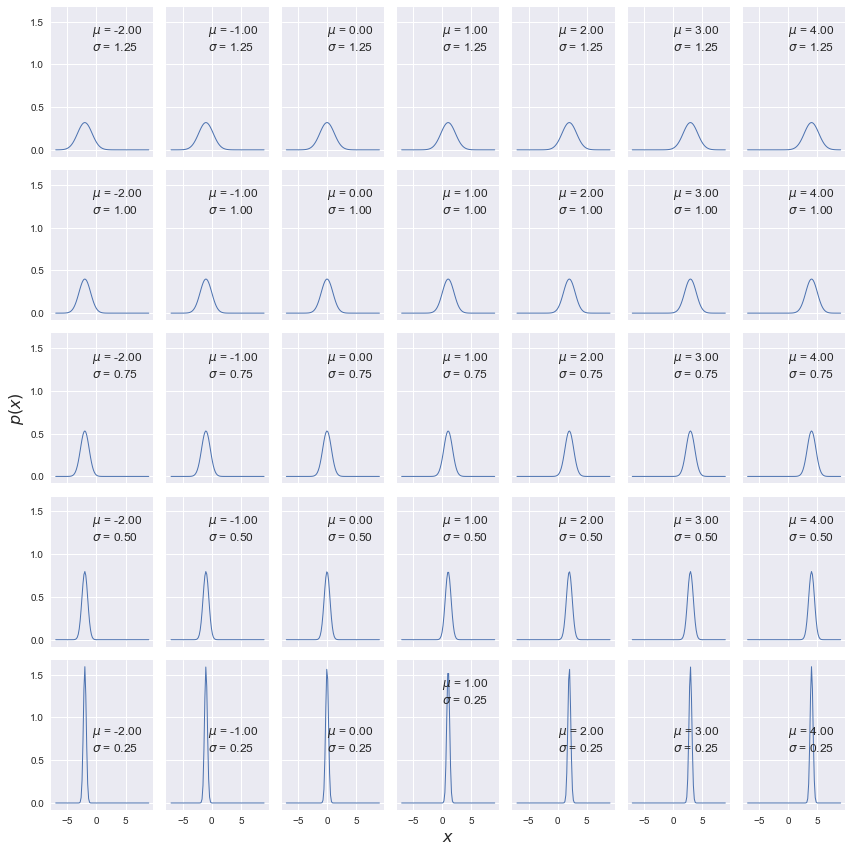

In [8]:
plot_density_family(stats.norm, μ, σ)

In [9]:
data = [0.82, 0.71, 0.78, 1.9, 0.68]

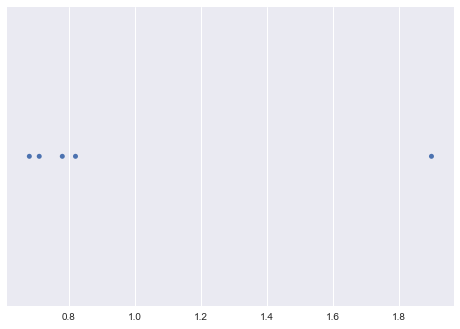

In [10]:
sns.swarmplot(data)

In [11]:
def log_likelihood(params, distribution, data):
    """
    Log likelihood of the parameters for the given the distribution and data.
    
    Parameters
    ----------
    params : tuple
        Parameters for the given distribution. For a distribution with
        2 parameters, like Gaussian, this will normally have 2 elements.
        
        The parameters may be scalars or may be vectors of (potentially different)
        lengths m and n. If vectors, the log likelihoods will be calculated for each
        combination of parameters and returned as a 3d array (m x n x len(data)).
    
    distribution : a scipy.stats distribution class
        Example: scipy.stats.norm
    
    data : array
        Observed data (1-dimensional)
        
    Returns
    -------
    array
        log likelihood of each data value.
        
        If `params` are scalars, this is a 1d array of length len(data).
        
        If `params` are vectors with lengths m and n, then this is a 3d array of shape (m, n, len(data)).
    """
    if len(params) != 2:
        raise NotImplementedError('only 2 parameters currently supported')
        
    (μ, σ) = params
    if np.ndim(μ) == np.ndim(σ) == 0:
        return distribution(*params).logpdf(data)
    
    # Construct an array of log likelihoods: m x n x len(data)
    μ, σ = np.atleast_1d(μ), np.atleast_1d(σ)
    loglik = np.empty((len(μ), len(σ), len(data)))
    for i, μ_i in enumerate(μ):
        for j, σ_j in enumerate(σ):
            loglik[i, j, :] = distribution(μ_i, σ_j).logpdf(data)
    return loglik

In [12]:
log_likelihood((μ, σ[0]), stats.norm, data).shape

(7, 1, 5)

In [13]:
np.array(μ)

array([-2, -1,  0,  1,  2,  3,  4])

In [14]:
np.array(σ)

array([ 0.25,  0.5 ,  0.75,  1.  ,  1.25])

In [15]:
loglik = log_likelihood((μ, σ), stats.norm, data).sum(axis=-1)

In [16]:
max_loglik = np.max(loglik)
max_loglik

-3.2835567632236367

We don't show any hypotheses having likelihood smaller than $e^{-8}$ times the maximum likelihood. These are the blank regions, which are for hypotheses which the data have ruled out.

In [17]:
threshold = -8

In [18]:
linewidths = np.clip(loglik - np.max(loglik) - threshold, 0, np.inf)

In [19]:
linewidths.shape

(7, 5)

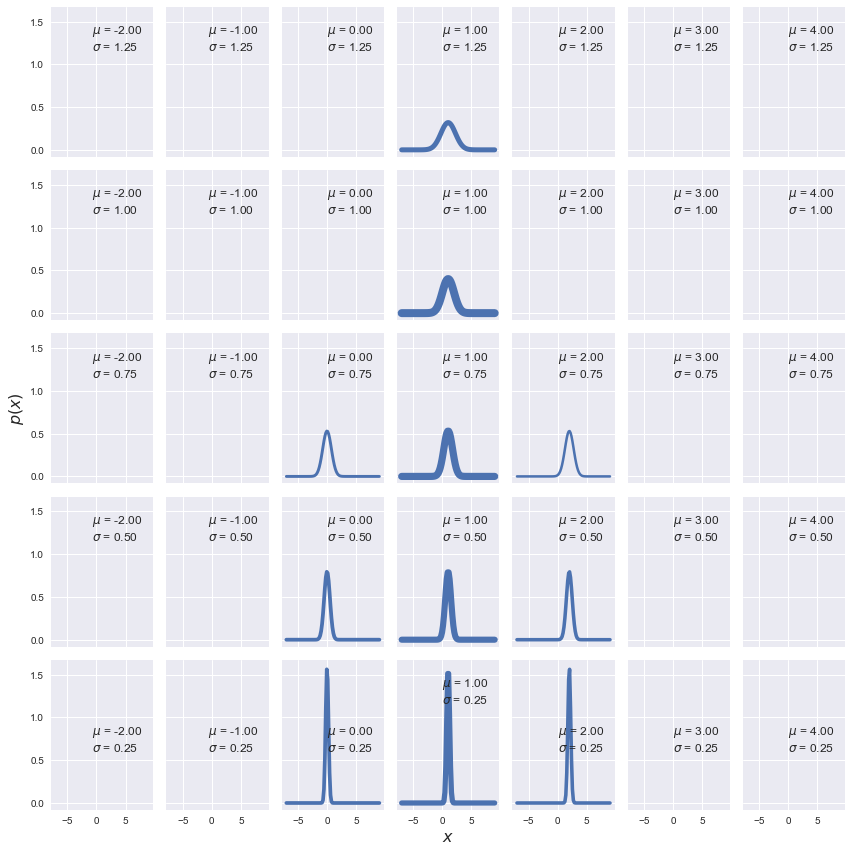

In [20]:
plot_density_family(stats.norm, μ, σ, linewidths=linewidths)

In [21]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

In [23]:
Z = log_likelihood((μ, σ), stats.norm, data).sum(axis=-1)

In [24]:
X, Y = np.meshgrid(μ, σ)

In [25]:
X.shape, Y.shape, Z.shape

((5, 7), (5, 7), (7, 5))

## Other stuff (not finished)

In [11]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

In [16]:
import numpy as np
import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 500)

In [2]:
!conda install --yes ipywidgets

Fetching package metadata .................
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /Users/schofield/anaconda/envs/py36:
#
ipywidgets                6.0.0                    py36_0  


In [3]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [1]:
from ipywidgets import interact
@interact(n=(1,10))
def printme(n=1):
    print(n)

1


In [2]:
printme()

1


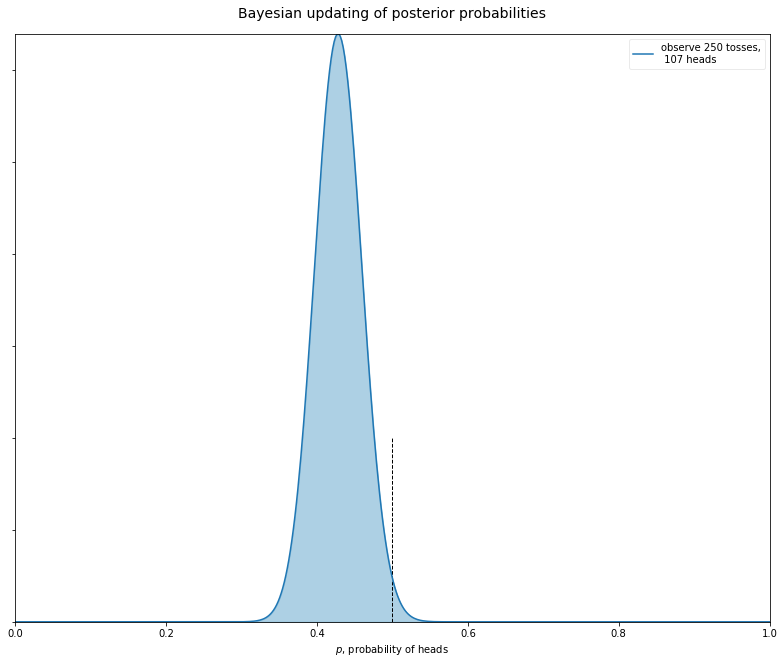

In [19]:
@interact(n=(1, 500))
def plot_posterior(n):
    plt.xlabel("$p$, probability of heads")
    plt.setp(plt.gca().get_yticklabels(), visible=False)
    heads = data[:n].sum()
    y = dist.pdf(x, 1 + heads, 1 + n - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (n, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


    plt.suptitle("Bayesian updating of posterior probabilities",
                 y=1.02,
                 fontsize=14)

    plt.tight_layout()